# Project 1

## Which Zipcode in King County Has the Most Expensive Sales Price on Average in 2014-2015 and What Makes it the "Most Expensive Zipcode"?

### Introduction

House price is an important economic indicator that is closely correlated to important economic variables such as employment rate, wage, inflation, interest rate, and etc. Also, in this case, discovering the most expensive zipcode in King County and the reason behind it could help investors to identify fruitful investment. Thus, this topic is important and interesting enough to be investigated. This project uses the dataset "kc_house_data.csv" from Kaggle.com. It includes sales information of homes sold between May 2014 and May 2015 in King County, including Seattle. The sales information contains price of sales in U.S. dollars and 19 features (i.e. number of bedroom, view) on 21613 observations across 70 different zipcodes. 

To answer the question, Y variable is homes' price of sales in U.S. dollars, and it will be grouped by zipcode to make comparisons in average house prices between zipcodes. On the other hand, 3 house features have been chosen to be potential factors that can influence house price, and these would be the X variables - square footage of the homes' interior living space(sqft_living), quality of construction and design(grade), and view. (Note that grade is an index from 1 to 13, where 1-3 falls short of building construction and design, 7 is an average level, and 11-13 indicates a high quality level. View is an index from 0 to 4 of how good the view of the property was.) The first two features are chosen based on their relatively strong correlation with homes' sales price, and view is chosen because King County owns great views that zipcodes with better views might be more popular than other zipcodes. In general, Y variable is price, and X variables are sqft_living, grade, and view.

In this stage of the project, there are several important changes made from last stage:

1. Changed message
2. Made adjustments according to the comments
3. Scraped data and merged with original data
4. Visualized, explained merged data
5. Updated intro and conclusion

First of all, the main message was restated, since I found that I was making this project quite complicated (intended to find causal relationship). The newly adjusted message will be more on topic. Secondly, adjustments have been made according to the comments on project 2. The comments include:
- Project 1
1. Use full variable names in plots
2. Change Data Grouped by Zipcode graphs to side-by-side boxplot 

- Project 2
1. Restated message (misunderstood what message was)
2. Fix message plot and explanation
3. No need to display read shape data outputs
4. Include legend title for graphs

Lastly, there are some new things added to the previous work, including data scraping, and some work relating to it. So these are the core changes that needs to be noticed.

### Import Data 

In [1]:
# ! pip install qeds
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qeds
import seaborn as sns
import warnings
%matplotlib inline

# activate plot theme
qeds.themes.mpl_style();

from IPython.display import display

In [2]:
# import and display dataset in dataframe format
data_path = "/Users/cindyxin/Documents/ECO225/ECO225Project/Data/kc_house_data.csv"
data = pd.read_csv(data_path)
pd.set_option("display.max_columns",21)
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
# information of variables (check for null and type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

This dataframe contains no missing values (null) and all features except for date have types float and int. This gives some suggestions on data cleaning that we do not need to clean null values and we can convert type of date to datetime objects.

### Data Cleaning

In [4]:
# make a copy of data to make changes on
cleaned_data = data.copy()

In [5]:
# converting date's type to datetime object, and extract month and year 
# of sales
from datetime import datetime

cleaned_data["datetime"] = pd.to_datetime(cleaned_data.date)
cleaned_data["yr_sales"] = cleaned_data["datetime"].dt.year
cleaned_data["mth_sales"] = cleaned_data["datetime"].dt.month

# replace yr_renovated with renovation dummy for houses renovated
cleaned_data["renovated"] = cleaned_data["yr_renovated"].apply(
    lambda x : 0 if x == 0 else 1)

# drop "useless" columns
cleaned_data = cleaned_data.drop(["date", "yr_renovated", "datetime", "id"],
                                 axis = 1)

cleaned_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          3      7        1180              0      1955    98178   
1     0          3      7        2170            400      1951    98125   
2     0          3      6         770              0      1933    98028   
3     0          5      7        1050            910      1965    98136   
4     0          3      8        1680              0      1987    98074   

       lat     long  sqft_living15  sqft_lot15  yr_sales  mth_sales  renovated  
0  47.5112 -122.257           1340        5650      2014         10          0  
1  47.7210 -122.319           1690        7639      2014         12          1  
2  47.7379 -122.233           2720        8062      2015          2          0  
3  47.5208 -122.393           1360        5000      2014         12          0  
4  47.6168 -122.045           1800        7503      2015          2          0

This output displays cleaned data. Three new columns are added- year of sales, month of sales, and renovated. We extracted year of sales and month of sales from sales date, and generated renovated dummy converted from year of renovation. Renovated is a dummy indicating whether the house was renovated or not. Renovated is included because instead of considering when the house was renovated, it's more meaningful to consider the house was renovated or not. Also, id is removed because there's no usefull information we can extract from it. In the end, date, yr_renovated, and id are removed from the original data while yr_sales, mth_sales, and renovated are added. 

### Choosing X Variables by Observing Correlation of House Price and Individual Features

In [6]:
# correlation with y variable
corr_matrix = cleaned_data.corr()
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
yr_sales         0.003576
mth_sales       -0.010081
zipcode         -0.053203
Name: price, dtype: float64

The correlation matrix shows that most of the features except for zipcode is positively correlated to the Y variable- price. This is reasonable because zipcode is area code, so it does not have any correlation with price as it increase. Observing the correlation of each feature and price (Y variable), we are going to choose features that are most correlated to price as X variables. These features are sqft_living, and grade. Other than purely observing features with highest correlation, view is also really important in a sense because there are great views in King County that zipcodes with great views may be significantly more popular than zipcodes without great views. Thus, view would also be a X variable.

In [7]:
# new dataframe of chosen X variables and Y variables
cleaned_data1 = cleaned_data[["zipcode", "price", "sqft_living", 
                              "grade", "view"]]

### Summary Statistics

#### 1. Data not Grouped by Zipcode

In [8]:
# summary statistics of chosen Xs and Y
print(cleaned_data1.describe())

            zipcode         price   sqft_living         grade          view
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000
mean   98077.939805  5.400881e+05   2079.899736      7.656873      0.234303
std       53.505026  3.671272e+05    918.440897      1.175459      0.766318
min    98001.000000  7.500000e+04    290.000000      1.000000      0.000000
25%    98033.000000  3.219500e+05   1427.000000      7.000000      0.000000
50%    98065.000000  4.500000e+05   1910.000000      7.000000      0.000000
75%    98118.000000  6.450000e+05   2550.000000      8.000000      0.000000
max    98199.000000  7.700000e+06  13540.000000     13.000000      4.000000


This data includes 21613 home sales located in 199 different zipcodes from 2014 May to 2015 May, in King County. Price of homes ranged from 75,000 U.S.D. to 7,700,000 U.S.D. For all features, means are bigger than medians so they all have a right skewed distribution. Also, the standard deviation of price shows there's a sufficient spread in price, so it is a valid Y variable.

##### Price Distribution

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


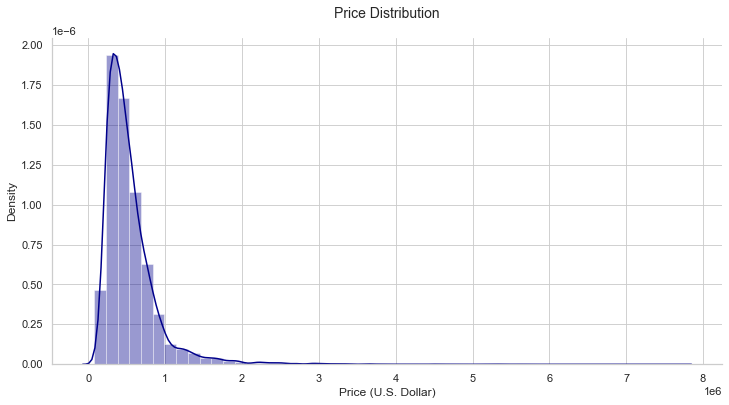

In [9]:
# histogram and kernel density estimation of price
sns.set(style = "whitegrid", rc = {"axes.spines.right": False, 
                                   "axes.spines.top": False})

fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.price, color = "darkblue", 
             axlabel = "Price (U.S. Dollar)")
plt.title("Price Distribution", fontsize = 14, pad = 20)

plt.show()

# hide warning
warnings.filterwarnings(action = "ignore")

In [10]:
# sales price ranked from high to low 
price_rank = cleaned_data1["price"].sort_values(ascending = False)
price_rank

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

Together with the summary statistics, the histogram and KDE shows that the distribution of price is right skewed as stated before. This distribution also shows that the maximum price may be a possible outlier, in which may have caused the skew. However, in the sales price rank chart, there are homes sold at prices at the same level as the maximum price. Thus, the maximum price is possibly not an outlier and may be kept in the data.  

##### Sqft_living Distribution

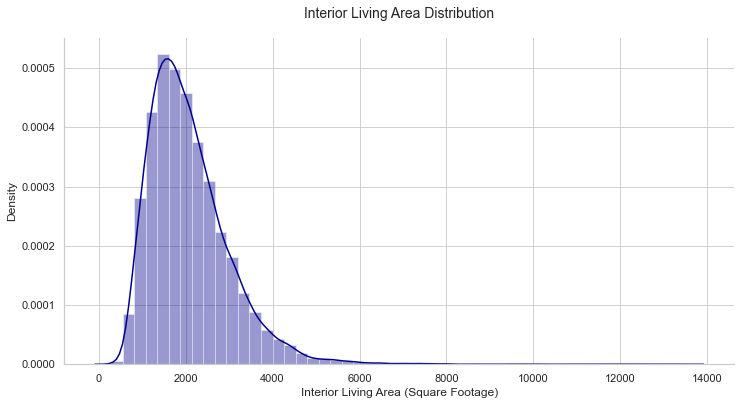

In [11]:
# histogram and kernel density estimation of sqft_living
fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.sqft_living, color = "darkblue",
            axlabel = "Interior Living Area (Square Footage)")
plt.title("Interior Living Area Distribution", fontsize = 14, pad = 20)

plt.show()

The distribution of square footage of the homes' interior living space is also right skewed, a similar shape to the price distribution. 

##### Relation between price and sqft_living

Text(0.5, 1.0, 'Price (U.S. Dollar) vs Interior Living Area (Square Footage)')

<Figure size 1440x1440 with 0 Axes>

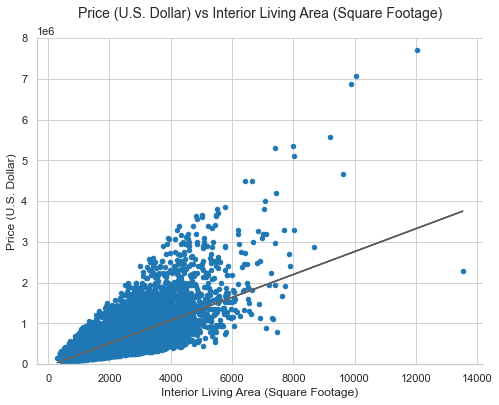

In [12]:
# scatterplot of price vs sqft_living
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (20, 20))

ax = cleaned_data1.plot.scatter(x = "sqft_living", 
                           y = "price", 
                           ylim = (0,8000000), figsize = (8, 6), 
                           c = np.array(color1).reshape(1,-1))

ax.set_xlabel("Interior Living Area (Square Footage)")
ax.set_ylabel("Price (U.S. Dollar)")

m, b = np.polyfit(cleaned_data1["sqft_living"], cleaned_data1["price"], 1)
plt.plot(cleaned_data1["sqft_living"], 
         m * cleaned_data1["sqft_living"] + b, c = plt.cm.tab20c(16))

plt.title("Price (U.S. Dollar) vs Interior Living Area (Square Footage)", 
          fontsize = 14, pad = 20)

This is a scatterplot of price vs sqft_living. Although the scatterplot is heteroscedastic, it shows a clear positive relationship between the square footage of the homes' interior living space and price. As the square footage of the homes' interior living space increases, the price increases as well.  

##### Grade Distribution

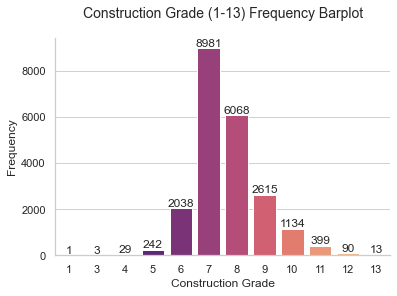

In [13]:
# barplot of grade
grade_bar = sns.countplot(x = cleaned_data1["grade"], data = cleaned_data1, 
                          palette = "magma")
plt.title("Construction Grade (1-13) Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("Construction Grade")
plt.ylabel("Frequency")
for count in grade_bar.containers:
    grade_bar.bar_label(count,)

plt.show()

This barplot shows that most of the homes have a grade of 6-9 in constrution and design. This indicates that most of the homes have a medium grade in construction and design. On the other hand, 4 homes have grades 1-3, which indicates poor construction and design. Also, 502 homes have high quality grades of 11-13 in construction and design.

##### Relation between price and grade

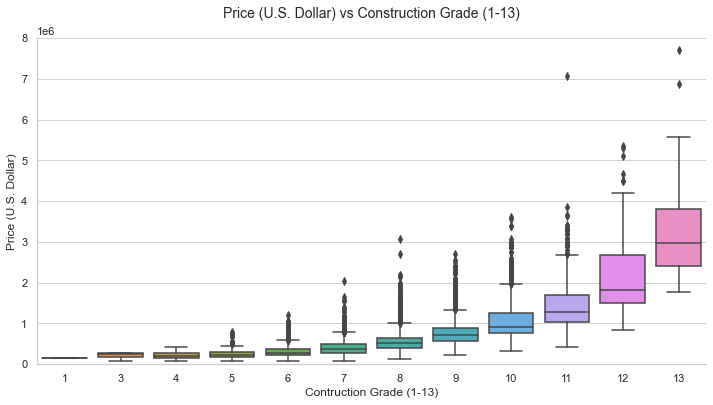

In [14]:
# boxplot of price vs grade
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["grade"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
plt.title("Price (U.S. Dollar) vs Construction Grade (1-13)", 
          fontsize = 14, pad = 20)
ax.set_xlabel("Contruction Grade (1-13)")
ax.set_ylabel("Price (U.S. Dollar)")

plt.show()

This boxplot shows a positive relationship between price and grade. Homes with lower construction and design grade tend to have lower sales price and homes with higher construction and design grade tend to have higher sales price. 

##### View Distribution

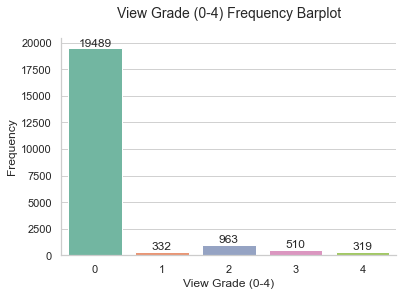

In [15]:
# barplot of view
view_bar = sns.countplot(x = cleaned_data1["view"] , data = cleaned_data1, 
                         palette = "Set2")
plt.title("View Grade (0-4) Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("View Grade (0-4)")
plt.ylabel("Frequency")
for count in view_bar.containers:
    view_bar.bar_label(count,)
 
plt.show()

Combining with the summary table, this barplot of grade of view shows that most of the homes sold have 0 as view grade. Only a small portion of homes have great views. Therefore, the relationship between view and y variable might not be as strong as other X variables. In this case, when comparing across zipcodes, comparing number of high view grades (grade of 3 or 4) would provide more information than comparing mean of view across zipcodes, which will be investigated later. (Mean of view would be very small and would not have obvious deviation across zipcodes)

##### Relation between price and view 

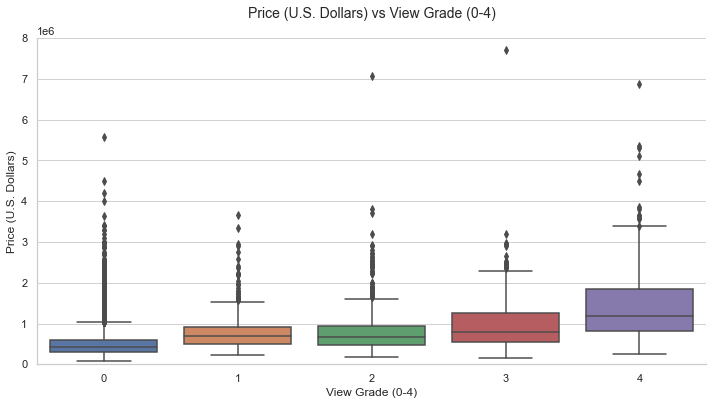

In [16]:
# boxplot of price vs view
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["view"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
ax.set_xlabel("View Grade (0-4)")
ax.set_ylabel("Price (U.S. Dollars)")
plt.title("Price (U.S. Dollars) vs View Grade (0-4)", fontsize = 14, pad = 20)
plt.show()

This is a boxplot of price vs view. Like the other features, view also has a positive but relatively weak relationship with price. Thus, houses with better views tend to have high sales price. 

Notice that there are several outliers in this graph, but these outliers may exist because these homes are possibly better in other features. Thus, it is still possible that homes without higher scores would have high sales price aswell. 

#### 2. Data Grouped by Zipcode

In [17]:
# dataset group by zipcode 
group = cleaned_data1.groupby("zipcode")

##### Price grouped by zipcode

In [103]:
# 2014-2015 average sales price of homes in different 
# zipcodes ranked by zipcode.
zipcode_mean_price = group["price"].mean()
zipcode_price_rank = zipcode_mean_price.sort_values(ascending = False)
zipcode_price_rank = zipcode_price_rank.reset_index()
zipcode_price_rank

zipcode         price
0     98039  2.160607e+06
1     98004  1.355927e+06
2     98040  1.194230e+06
3     98112  1.095499e+06
4     98102  9.012583e+05
..      ...           ...
65    98148  2.849086e+05
66    98001  2.808047e+05
67    98032  2.512962e+05
68    98168  2.403284e+05
69    98002  2.342840e+05

[70 rows x 2 columns]

The ranked table shows that zipcode 98039 has the most expensive sales price on average in 2014-2015 (this will be visually displayed in Project 2 section by heatmap).

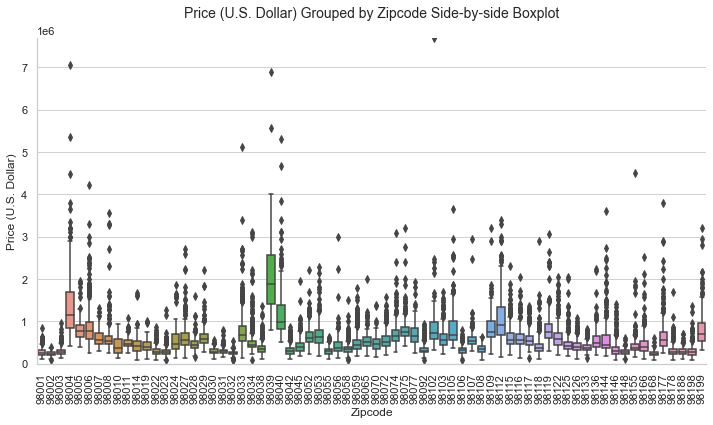

In [185]:
# price group by zipcode side-by-side boxplot
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["zipcode"], 
                  y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 7.7e+06)

plt.title("Price (U.S. Dollar) Grouped by Zipcode Side-by-side Boxplot", 
          fontsize = 14, pad = 20)
ax.set_xlabel("Zipcode")
ax.set_ylabel("Price (U.S. Dollar)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

Consistent with the ranked table, the side-by-side boxplot shows that in 2014-2015, homes in zipcode 98039 also have the most expensive median sales price.

##### Sqft_living grouped by zipcode

In [193]:
# 2014-2015 average square footage of the apartments' interior 
# living space in different zipcodes ranked by zipcode.
zipcode_mean_sqft_living = group["sqft_living"].mean()
zipcode_sqft_living_rank = zipcode_mean_sqft_living.sort_values(
    ascending = False)
zipcode_sqft_living_rank = zipcode_sqft_living_rank.reset_index()
zipcode_sqft_living_rank

zipcode  sqft_living
0     98039  3800.900000
1     98040  3106.833333
2     98075  3016.370474
3     98004  2909.022082
4     98006  2888.295181
..      ...          ...
65    98148  1610.526316
66    98107  1579.548872
67    98126  1543.596045
68    98106  1487.883582
69    98168  1468.624535

[70 rows x 2 columns]

The ranked table shows 2014-2015 average square footage of the apartments' interior living space in different zipcodes ranked by zipcode. Note that houses in zipcode 98039 have the largest interior living area on average while having the highest average sales price at the same time. Also, some of the other zipcodes' ranks in area of interior living space also do not vary by much than their rank in price (this will be visually displayed in Project 2 section by heatmap).

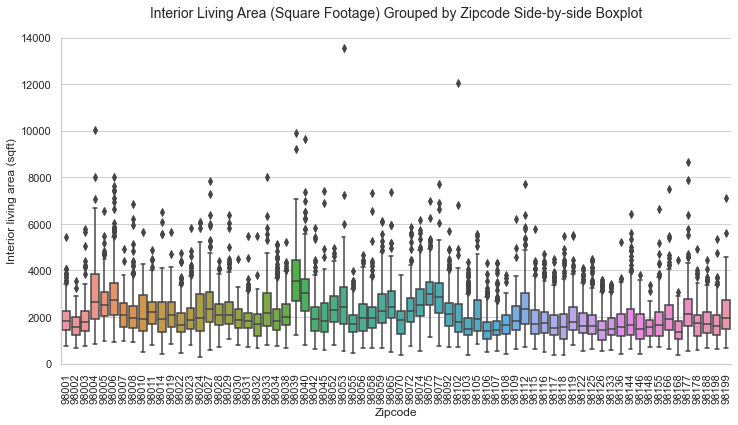

In [119]:
# sqft_living group by zipcode side-by-side boxplot
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["zipcode"], 
                  y = cleaned_data1["sqft_living"])
fig.axis(ymin = 0, ymax = 14000)

plt.title("Interior Living Area (Square Footage) Grouped by Zipcode Side-by-side Boxplot", 
          fontsize = 14, pad = 20)
ax.set_xlabel("Zipcode")
ax.set_ylabel("Interior living area (sqft)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

Consistent with the ranked table, the side-by-side boxplot shows that in 2014-2015, homes in zipcode 98039 also have the largest median interior living area. Comparing to the price's boxplot, the two side-by-side boxplots show there's a similar pattern in the two variables (interior living area and price). The two variables' peaks tend to appear on the same zipcodes, such as 98004, 98039, 98075, and 98112. This also shows a positive relationship between price and interior area.

##### Grade grouped by zipcode

In [133]:
# 2014-2015 average grade on quality of construction and design of 
# homes in different zipcodes ranked by zipcode.
zipcode_mean_grade = group["grade"].mean()
zipcode_grade_rank = zipcode_mean_grade.sort_values(ascending = False)
zipcode_grade_rank = zipcode_grade_rank.reset_index()
zipcode_grade_rank

zipcode     grade
0     98039  9.560000
1     98075  9.008357
2     98040  8.960993
3     98006  8.795181
4     98077  8.782828
..      ...       ...
65    98106  6.865672
66    98146  6.822917
67    98178  6.816794
68    98002  6.693467
69    98168  6.509294

[70 rows x 2 columns]

The ranked table shows 2014-2015 average construction grade in different zipcodes ranked by zipcode. Note that houses in zipcode 98039 have the highest construction grade on average while having the highest average sales price, and the largest interior living space at the same time. Also, some of the other zipcodes' ranks in area of interior living space also do not vary by much than their rank in price.

Text(0.5, 1.0, 'Mean Construction Grade Group by Zipcode')

<Figure size 1440x1440 with 0 Axes>

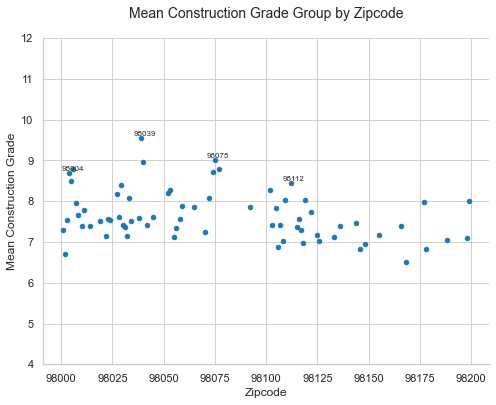

In [203]:
# construction grade group by zipcode scatterplot
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (20, 20))

ax = zipcode_grade_rank.plot.scatter(x = "zipcode", 
                           y = "grade", 
                           ylim = (4,12), figsize = (8, 6), 
                           c = np.array(color1).reshape(1,-1))

for (i, row) in zipcode_grade_rank.iterrows():
    zipcode = int(row[0])
    if zipcode in [98039, 98004, 98075, 98112]:
        offset = (-8, 2)

        ax.annotate(
            zipcode, xy = (row["zipcode"], row["grade"]),
            xytext = offset, textcoords="offset points",
            fontsize = 8
    )

ax.set_xlabel("Zipcode")
ax.set_ylabel("Mean Construction Grade")

plt.title("Mean Construction Grade Group by Zipcode", 
          fontsize = 14, pad = 20)

This scatter plot shows the same thing as in the ranked table, that in 2014-2015, zipcode 98039 has on average the highest construction grade. Also, some peaks in the price and interior living area group by zipcode plots at zipcodes including 98075 and 98112 are also peaks in construction grade. This shows there may be positive relationship between price and grade of construction. However, it is hard to visually compare construction grade across zipcodes. Thus, we will further investigate it by map in Project 2 section.  

##### Number of High view grade grouped by zipcode

In [173]:
# 2014-2015 average grade on view of homes in different zipcodes 
# ranked by zipcode.
zipcode_count_hview = group["view"].apply(lambda x: x[x >= 3].count())
zipcode_count_hview = zipcode_count_hview.sort_values(ascending = False)
zipcode_count_hview = zipcode_count_hview.reset_index()
zipcode_count_hview

zipcode  view
0     98006    64
1     98040    40
2     98116    38
3     98177    35
4     98198    32
..      ...   ...
65    98148     0
66    98168     0
67    98002     0
68    98133     0
69    98077     0

[70 rows x 2 columns]

The ranked table of 2014-2015 number of high view grade in different zipcodes is ranked by zipcode. This ranked table only shows little similarity to the ranked table of price. However, number of high view grade group by zipcode could further investigated by data visualization. 

Text(0.5, 1.0, 'Number of High View Grade Group by Zipcode')

<Figure size 1440x1440 with 0 Axes>

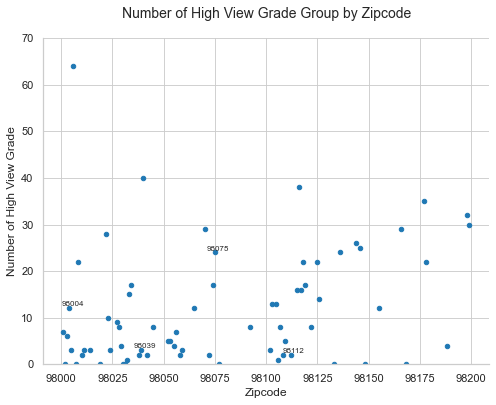

In [174]:
# number of high view grade group by zipcode scatterplot
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (20, 20))

ax = zipcode_count_hview.plot.scatter(x = "zipcode", 
                           y = "view", 
                           ylim = (0,70), figsize = (8, 6), 
                           c = np.array(color1).reshape(1,-1))

for (i, row) in zipcode_count_hview.iterrows():
    zipcode = int(row[0])
    if zipcode in [98039, 98004, 98075, 98112]:
        offset = (-8, 2)

        ax.annotate(
            zipcode, xy = (row["zipcode"], row["view"]),
            xytext = offset, textcoords="offset points",
            fontsize = 8
    )
ax.set_xlabel("Zipcode")
ax.set_ylabel("Number of High View Grade")

plt.title("Number of High View Grade Group by Zipcode", 
          fontsize = 14, pad = 20)

It is quite hard to observe smilarity in mean view grade group by zipcode and mean price group by zipcode, since the "peak zipcodes" (98004, 98039, 98075, 98112) in mean price by zipcode are no longer peaks. We will further investigate this variable later by map in Project 2.

In general, one important thing to notice is that in 2014-2015, homes in zipcode 98039 have the biggest square footage of the homes' interior living space. At the same time, this zipcode also has the best average grade on quality of construction and design, and the zipcode is on average the most expensive zipcode in the time period. The variable view itself has a positive relationship with price, but when comparing across zipcodes, simply comparing mean of view is not the best way. A better way is to compare number of houses with high grade view. We would investigate view across zipcodes further by using a map to visually display it.

# Project 2

### Main Message

The main message: Zipcode 98039 the most expensive zipcode in King County in 2014-2015, and its high house sales price can be explained by features- interior area, and construction grade.

The potential evidence supporting this message is that the price plots in the summary statistics section have showed that zipcode 98039 was on average the most expensive zipcode in 2014-2015 in King County. At the same time, the two features have positive relationship with house sales price whether group by zipcode or not. Also, notice that variable- view grade is not included, since when grouped by zipcode, its relationship with price is ambiguous. However, we will further investigate in this variable by map later, and so far, the findings only allow us to assume that two out the three features can explain the high sales price in zipcode 98039.

##### Plot

###### Price by zipcode vs interior living area by zipcode

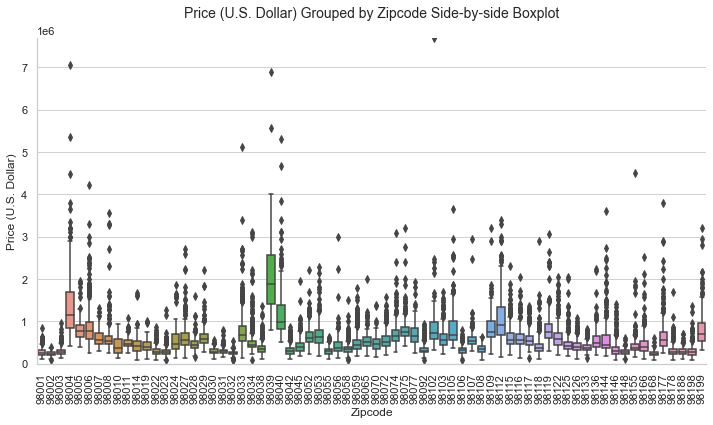

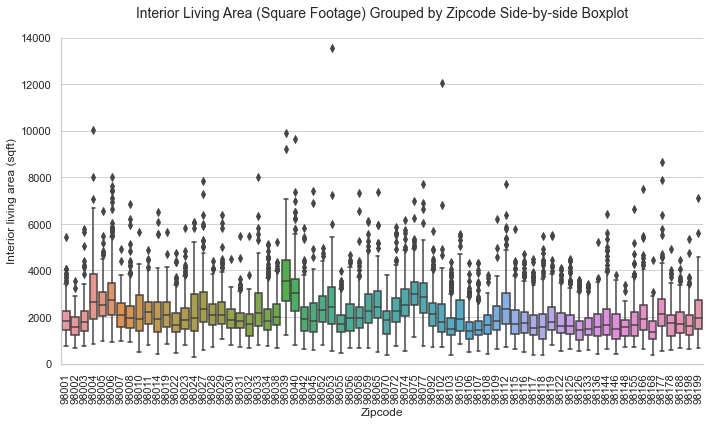

In [250]:
# price group by zipcode side-by-side boxplot vs sqft_living group by zipcode side-by-side boxplot
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["zipcode"], 
                  y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 7.7e+06)

plt.title("Price (U.S. Dollar) Grouped by Zipcode Side-by-side Boxplot", 
          fontsize = 14, pad = 20)
ax.set_xlabel("Zipcode")
ax.set_ylabel("Price (U.S. Dollar)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

fig1, ax1 = plt.subplots(figsize = (11.5, 6))
fig1 = sns.boxplot(x = cleaned_data1["zipcode"], 
                  y = cleaned_data1["sqft_living"])
fig1.axis(ymin = 0, ymax = 14000)

plt.title("Interior Living Area (Square Footage) Grouped by Zipcode Side-by-side Boxplot", 
          fontsize = 14, pad = 20)
ax1.set_xlabel("Zipcode")
ax1.set_ylabel("Interior living area (sqft)")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

plt.show()

###### Price by zipcode vs construction grade by zipcode

Text(0.5, 1.0, 'Mean Construction Grade vs Mean Price (scaled) when Group by Zipcode')

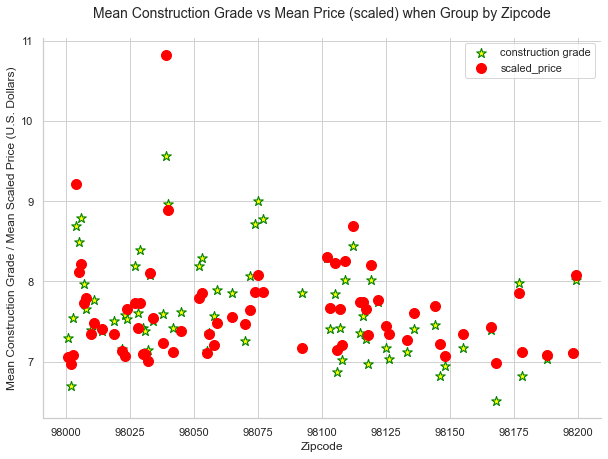

In [251]:
# mean price group by zipcode vs mean construction grade group by zipcode scatterplot
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (10, 7))

zipcode_price_rank["scaled_price"] = zipcode_price_rank["price"]/500000 + 6.5

plt.scatter(zipcode_grade_rank["zipcode"], zipcode_grade_rank["grade"],
            s= 100, marker = "*", color = "yellow", edgecolors = "green",
             linewidths = 1.1)

plt.scatter(zipcode_price_rank["zipcode"], zipcode_price_rank["scaled_price"],
            s =100, marker = "o", color = "red")

plt.legend(["construction grade", "scaled price"], ncol = 1, loc = "upper right")
plt.xlabel("Zipcode")
plt.ylabel("Mean Construction Grade / Mean Scaled Price (U.S. Dollars)")

plt.title("Mean Construction Grade vs Mean Price (scaled) when Group by Zipcode", 
          fontsize = 14, pad = 20)

###### Price by zipcode vs number of high view grade by zipcode

Text(0.5, 1.0, 'Number of High (3 or 4) View Grades vs Mean Price (scaled) when Group by Zipcode')

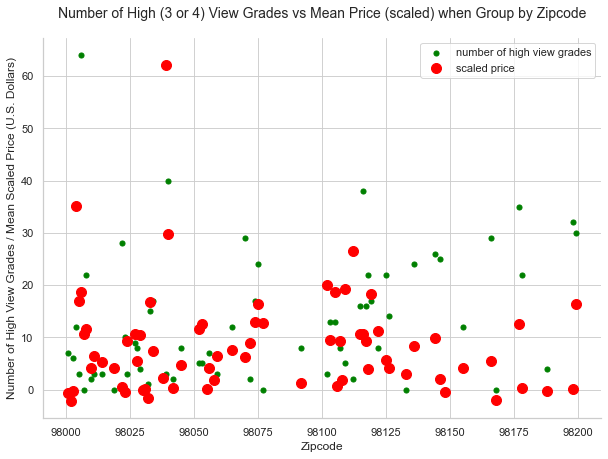

In [263]:
# mean price group by zipcode vs mean construction grade group by zipcode scatterplot
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (10, 7))

zipcode_price_rank["scaled_price"] = zipcode_price_rank["price"]/30000 - 10

plt.scatter(zipcode_count_hview["zipcode"], zipcode_count_hview["view"],
            s= 100, marker = ".", color = "green",
             linewidths = 1.1)

plt.scatter(zipcode_price_rank["zipcode"], zipcode_price_rank["scaled_price"],
            s =100, marker = "o", color = "red")

plt.legend(["number of high view grades", "scaled price"], ncol = 1, loc = "upper right")
plt.xlabel("Zipcode")
plt.ylabel("Number of High View Grades / Mean Scaled Price (U.S. Dollars)")

plt.title("Number of High (3 or 4) View Grades vs Mean Price (scaled) when Group by Zipcode", 
          fontsize = 14, pad = 20)

##### Plot Interpretation

Knowing that zipcode 98039 is the most expensive zipcode on average, each (set) of the plots show the relationship between a certain housing feature and house sales price when group by zipcode. The results are consistent with the message, that the features- interior living area and construction grade show much similarites in shape and pattern with price when group by zipcode. More specifically, the zipcode 98039 has highest average price, while having largest interior living area and highest construction grade. 

On the other hand, when number of high view grade is compared to scaled price, it does not show much similarity in shape and pattern like the other two features. Zipcode 98039 does not have the highest number of houses with high view grade, or we can even say that 98039 does not have a high number of houses with high view grade. In this case, it's possible to say that it barely contributes to zipcode 98039's high house sales price. However, we can investigate this variable further later and see if there are any interesting findings with this variable.

Thus, the plots above fully support the message, and in conclusion, we can say that part of the reasons why houses in zipcode 98039 in 2014-2015 in King County are on average most expensive is that they have large interior living space and high construction quality.

### Maps

Click [here](https://utoronto-my.sharepoint.com/:f:/g/personal/cindyxin_xin_mail_utoronto_ca/Ek8psA_w8uZIuqNroG3UNMsB1enlMbSWK6edC0wotdnELA?e=gsP3mK) to see map with hover. Or by link:
https://utoronto-my.sharepoint.com/:f:/g/personal/cindyxin_xin_mail_utoronto_ca/Ek8psA_w8uZIuqNroG3UNMsB1enlMbSWK6edC0wotdnELA?e=gsP3mK 

#### Reading U.S. Zipcode and County Shape Data

In [28]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [29]:
# Read Zipcode Shape
zipcode_df = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip")

In [30]:
# Read County Shape
county_df = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip")

In [31]:
king_df = county_df.loc[county_df["NAME"] == "King"]
king_df

STATEFP COUNTYFP  COUNTYNS  GEOID  NAME     NAMELSAD LSAD CLASSFP  MTFCC  \
2021      53      033  01531933  53033  King  King County   06      H1  G4020   
2652      48      269  01383920  48269  King  King County   06      H1  G4020   

     CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND     AWATER     INTPTLAT  \
2021   500  42660    42644        A  5478557088  497719285  +47.4905993   
2652  None   None     None        A  2359148814    6398044  +33.6142675   

          INTPTLON                                           geometry  
2021  -121.8339960  POLYGON ((-122.47069 47.52789, -122.46985 47.5...  
2652  -100.2453455  POLYGON ((-100.51869 33.83565, -100.51861 33.8...

Given the STATEFP, STATEFP 53 indicates that the first one is the one we want, which means it's the one in Washington. The second one with STATEFP 48 is in Texas, which we don't need. From this output, we know INTPTLAT, INTPTLON, and geometry of King County, are useful information when generating maps.

#### Visualizing Mean Price by Zipcode on a Map

##### Import Packages and Setup Dataframe for Bokeh Map
It's impossible to combine price by zipcode (zipcode_mean_price) and zipcode shape data (zipcode_df) directly because there's no zipcode column in zipcode shapefile, and ZCTA5CE10 is not the same as zipcode from our original data. A general outline of how the two data could be combined:
1. get 1 point coordinate for each zipcode from house sales data (naming these coordinates zipcode indicator   coordinates)
2. Check EPSG, and convert zipcode indicator coordinates to geodata
3. gpd.sjoin zipcode indicator coordinates with zipcode shapefile polygons to align zipcode with INTPTLAT10, and INTPTLON10. 
4. to add the polygons back into the file, merge the dataframe with zipcode shape data again by on = "INTPTLAT10". The floats in this column are specific enough so we don't need to consider INTPTLON10 at the same time. 
5. merge the dataframe with zipcodes' mean price 
6. create new daframe with columns zipcode, geometry(polygon), and price. <br>

Then, we could convert this new dataframe to geojson, and then it could be used directly when generating bokeh map.

In [48]:
# import packages
# !pip install bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [49]:
# Getting 1 point coordinate for each zipcode from house sales 
# data, let's call them zipcode indicator coordinates

# 1. group house sales data by zipcode
zip_group = cleaned_data.groupby("zipcode")

# 2. take mean of longtitudes and lattitudes of houses in each 
# zipcode group
zipcode_mean_long = zip_group["long"].mean()
zipcode_mean_lat = zip_group["lat"].mean()

# 3. zip longtitude and lattitude of each zipcode and make 
# a list of it 
long_lat = list(zip(zipcode_mean_long, zipcode_mean_lat))

# 4. make new dataframe with 1 coordinate per zipcode
long_lat_df = pd.Series(long_lat).to_frame("coordinates")
zipcode_mean_lat = zipcode_mean_lat.reset_index()
long_lat_df["zipcode"] = zipcode_mean_lat["zipcode"]

In [50]:
# converting zipcode indicator coordinates to geodata
long_lat_df["coordinates"] = long_lat_df["coordinates"].apply(Point)
geo1_df = gpd.GeoDataFrame(long_lat_df, geometry = "coordinates")
geo1_df

coordinates  zipcode
0   POINT (-122.27065 47.30902)    98001
1   POINT (-122.21336 47.30878)    98002
2   POINT (-122.31005 47.31574)    98003
3   POINT (-122.20519 47.61618)    98004
4   POINT (-122.16727 47.61153)    98005
..                          ...      ...
65  POINT (-122.36928 47.74238)    98177
66  POINT (-122.24697 47.49912)    98178
67  POINT (-122.28099 47.44731)    98188
68  POINT (-122.31574 47.39079)    98198
69  POINT (-122.39846 47.64810)    98199

[70 rows x 2 columns]

This output shows that now we obtain 1 coordinate per zipcode (zipcode indicator coordinates). Next step, we will plug the indicator coordinates into the zipcode shape data's polygons to align zipcodes with their shapes. 

In [51]:
# gpd.sjoin zipcode indicator coordinates with zipcode shape data 
# polygons. Now we've aligned zipcode with INTPTLAT10, and INTPTLON10
zipcode_ZCTA_merge = gpd.sjoin(geo1_df, zipcode_df, op = "within")

# merge the above dataframe with zipcode shapefile to align zipcode 
# and zipcode polygon by on = "INTPTLAT10 or INTPTLON10"
zipcode_shape = zipcode_ZCTA_merge.merge(zipcode_df, on = "INTPTLAT10")

# merge zipcode shape data with mean price of each zipcode by on = "zipcode"
price_zip = zipcode_shape.merge(zipcode_mean_price, on = "zipcode")

# extract zipcode, zipcode geometry, and price
price_zip1 = price_zip[["zipcode", "geometry", "price"]]

# converting data to geojson
price_zip1 = gpd.GeoDataFrame(price_zip1, geometry = "geometry")
price_zip2 = GeoJSONDataSource(geojson = price_zip1.to_json())

##### Generating Bokeh Map

In [76]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9],
                                 low = 2.2e+06, high = 2.3e+05)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), (
                                "Mean Price (U.S. Dollar)", "@price")])

plot = figure(title = "Mean Price (U.S. Dollar) by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = price_zip2, 
             fill_color = {"field": "price", "transform": color_mapper})

plot.add_layout(color_bar, "below")

show(plot)

This hover map displays the average house sales price of each zipcode. The most expensive zipcode is 98039, dark red in color. Then, in order, the second most expensive zipcode is 98004, and next is 98040. The two zipcodes with moderate sales price are 98112 and 98102, located beside 98039. Note that these zipcodes are located together geographically, approximately at lattitude +47.6 and longtitude -122.2. More generally, houses in the north tend to be more expensive than houses in the south. This indicate that there may be geographic advantages in the north. 

#### Visualizing Average Square Footage of the Apartments' Interior Living Space by Zipcode on a Map

##### Setup Dataframe for Bokeh Map
For this bokeh map, it would follow the same procedure as the first bokeh map, except this time, we can directly use the aligned zipcode and zipcode polygon data- zipcode_shape. One thing different is that now we are mapping interior living area instead of price. 

In [37]:
# merge zipcode shape data with mean sqft_living of each zipcode 
# by on = "zipcode"
sqft_living_zip = zipcode_shape.merge(zipcode_mean_sqft_living, 
                                      on = "zipcode")

# extract zipcode, zipcode geometry, and price
sqft_living_zip1 = sqft_living_zip[["zipcode", "geometry", 
                                    "sqft_living"]]

# converting data to geojson
sqft_living_zip1 = gpd.GeoDataFrame(sqft_living_zip1, geometry = 
                                    "geometry")
sqft_living_zip2 = GeoJSONDataSource(geojson = 
                                     sqft_living_zip1.to_json())

##### Generating Bokeh Map

In [44]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9], 
                                 high = 1460, low = 3810)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), (
                                "Mean Interior Living Area (sqft)", "@sqft_living")])

plot = figure(title = "Mean Interior Living Area (sqft) by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = sqft_living_zip2, 
             fill_color = {"field": "sqft_living", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

Square footage of the apartments' interior living space has been chosen to be the most important X variable since it has the highest correlation to price. Due to its high correlation with price, the map shows a similar color distribution as map of price. Zipcode 98039 on average has the largest interior area and zipcodes 98040 has the second largest average interior area. Zipcode 98004, located beside 98039 and 98040, also has a large average interior area along with a few other zipcodes located in the north. Again, zipcodes in the north tend to have larger interior area on average at the same time as having higher sales price. This verifies a positive relationship between interior living area and price when grouped by zipcode. 

#### Visualizing Average Construction Grade by Zipcode on a Map

##### Setup Dataframe for Bokeh Map

In [175]:
# merge zipcode shape data with mean construction grade of each zipcode 
# by on = "zipcode"
grade_zip = zipcode_shape.merge(zipcode_mean_grade, 
                                      on = "zipcode")

# extract zipcode, zipcode geometry, and price
grade_zip1 = grade_zip[["zipcode", "geometry", 
                              "grade"]]

# converting data to geojson
grade_zip1 = gpd.GeoDataFrame(grade_zip1, geometry = 
                              "geometry")
grade_zip2 = GeoJSONDataSource(geojson =
                              grade_zip1.to_json())

##### Generating Bokeh Map

In [179]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9], 
                                 high = 6, low = 10)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), (
                                "Mean Construction Grade", "@grade")])

plot = figure(title = "Mean Construction Grade by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = grade_zip2, 
             fill_color = {"field": "grade", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

This map is a better visualization than the scatter plot. In this plot there's clear evidence that there's a lot 
similarity in color distribution between price and construction grade. This indicates there's a strong relationship between construction grade and price when comparing across zipcodes. Specifically, zipcode 98039 on average has the highest construction grade and zipcodes 98040, 98004, also have high construction grades. Many other zipcodes located in the north also have high construction grades on average at the same time as having higher sales price. This verifies a positive relationship between construction grade and price when grouped by zipcode. 

#### Visualizing Number of Houses with High Grade in View by Zipcode on a Map

From the previous view grade by zipcode plots, we notice that it's not really meaningful to compare number of high grade views in different zipcodes than comparing mean of view in different zipcodes. Due to the fact that a large portion of houses sold has 0 in view grade, if we map mean of view by zipcode in a hover map, the colors of zipcodes in the hover map would not have obvious deviations. Thus, we will map number of high grade view by zipcode instead. The bokeh map will be generated using a similar method as before.

##### Setup Dataframe for Bokeh Map

In [39]:
# merge zipcode shape data with number of high view of each zipcode 
# by on = "zipcode"
view_zip = zipcode_shape.merge(zipcode_count_hview, on = "zipcode")

# extract zipcode, zipcode geometry, and price
view_zip1 = view_zip[["zipcode", "geometry", "view"]]

# converting data to geojson
view_zip1 = gpd.GeoDataFrame(view_zip1, geometry = "geometry")
view_zip2 = GeoJSONDataSource(geojson = view_zip1.to_json())

##### Generating Bokeh Map

In [40]:
# reverse high and low values for better color visualization
color_mapper = LinearColorMapper(palette = brewer["YlOrRd"][9], 
                                 high = 0, low = 65)

color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,
                     width = 510, height = 18, border_line_color = None, 
                     location = (0,0), orientation = "horizontal")

hover = HoverTool(tooltips = [ ("Zipcode","@zipcode"), ("View", "@view")])

plot = figure(title = "View by Zipcode", tools = [hover])
plot.patches("xs", "ys", source = view_zip2, 
             fill_color = {"field": "view", "transform": color_mapper})

plot.add_layout(color_bar, "below")
show(plot)

It is essential to generate a map for view because there needs further explanation on the variable when grouped by zipcode, This plot shows obvious deviation in color across different zipcodes, further proving that comparing number of houses with high grade in view across zipcodes is an acceptable method. 

Observing the map, zipcodes 98006 and 98040 tend to have most houses with high grade in view, whereas zipcode 98039 (highest sales price zipcode) has a low number of high grade in view. This means zipcode 98039 is the most expensive zipcode does not have anything to do with view. However, view has a strong positive relationship with the house prices in zipcodes 98006 and 98040. Thus, although it does not directly contribute to investigate the topic, it is still possible to say that view does contribute to some high price zipcodes' high price other than 98039. In other words, it possible to say that having a great view can be a factor making some zipcodes expensive.

Also, notice that the number of high grade in view tend to be higher in zipcodes located by the waterbody on the west, and higher in the zipcode on the south, showing small similarity between view's color distribution and price's color distribution. In this case, one interesting finding beyond the topic is that view's effect on price might not be as strong as the other variables, but it still does have a relationship with price.  

#### General Findings from Maps

In conclusion, zipcode 98039 is on average the most expensive zipcode. The houses in this zipcode has largest interior living area on average, and highest average construction grade. Also, there are positive relationships between each of the three X variables- interior living area, construction grade, goodness of view, and Y variable- price individually.
This helps to conclude that zipcode 98039 has the highest price on average, and this could be explained by large interior living area and high construction grade. Price of other expensive zipcodes are not only explained by large interior living area and high construction grade, but may also be explained by high quality view. 

Also, from the maps, zipcodes that are located by lattitude +47.6 and longtitude -122.2 have higher prices, larger interior living area, and most of these zipcodes have higher number great views relative to other zipcodes. This indicates a possible geographical advantage at the location.

# Poject 3

### Data Scraping (HTML based)

From the previous sections, we know that large interior living space and high construction grade are part of the reasons why zipcode 98039 has on average the highest house sales price. Now, we will investigate more into the question- "What makes 98039 the most expensive zipcode?" 

To enrich the answer to the question, it's also important to look outside of the box, and search for some potential factors other than the housing features. In this part, we will investigate two additional variables- number of parks and natural areas in zipcode and zipcodes' mean household income between 2010 and 2014 in King County. Income has been chosen because there are important correlations between income and house price. Families with higher family income would often be able to buy houses at a high price. Also, in urban economics, people with higher income tend to be able to spend more recreation time in natural areas than lower income population. Based on the reasonings, parks and natural areas are also possible to be positively related to price like income. 

Combining all the reasonings, as an extension of the message, there's possibility that the most expensive zipcode- 98039 on average has a high number of parks and natural areas, and a high mean household income.

We will gather data by data scraping two websites using HTML based data scraping:
- list of parks, park info, and address of parks for parks in King County
1. https://www.niche.com/places-to-live/search/zip-codes-with-the-best-public-schools/c/king-county-wa/
- mean household income by zipcode 
2. http://www.usa.com/rank/washington-state--mean-family-income--zip-code-rank.htm?hl=&hlst=&wist=&yr=9000&dis=&sb=DESC&plow=&phigh=&ps=

The first data displays "A Complete List of King County Parks, Trails & Open Space from A-Z". This data is useful because it contains a list of all parks and natural areas in King County, including park information such as address. This data is perfect for HTML based scraping, I would use this method to extract each park's zipcode from park address, and then create a dataframe with two columns- zipcode with parks, and number parks in the zipcode. Then, merge it with mean price group by zipcode dataframe, with on = zipcode in the park dataframe. Then I would visually display the relationship between number of natural areas and mean price group by zipcode. If they show clear relationship, and if zipcode 98039 has a lot of parks, then it would help to answer my research question stated before.

The second data displays "Washington Mean Family Income Zip Code Rank in 2010-2014". This data is useful because it contains a list of mean household income in Washington by zipcode. This data is also perfect for HTML based scraping, I would use this method to extract each zipcodes' mean family income, and then create a dataframe with two columns- zipcode, and zipcodes' mean family income. Then, merge it with mean price group by zipcode dataframe, with on = zipcode in the price dataframe. At last, visually display the relationship between mean household income by zipcode and mean price group by zipcode. If they show clear relationship, and if zipcode 98039 has high mean household income, then it would help to answer my research question.

Note that for project 3, we've been told that we have to scrape data that we are unable to download. This will be the case for number of parks and natural areas, whereas mean household income by zipcode can be obtained from ACS (but it's unorganized). The advantage of scraping from the second website is that it saves a lot of time and energy from organizing the gigantic dataset into a clean table that's perfect for my orginal data. So, scraping mean household income by zipcode is purely based on interest, not for data scraping in project 3. 

Fortunately, both data can be scraped using HTML based scraping, and after viewing the page sources, it turns out that both page sources are quite neat, and we are able to find needed information through specific tags. Below is the complete data scraping process of the two websites:

#### - Number of parks by zipcode (for project 3 marking)

In [339]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = "https://kingcounty.gov/services/parks-recreation/parks/parks-and-natural-lands/parksatoz.aspx"
response = requests.get(web_url)
response

print("Status code\n", response.status_code)

Status code
 200


This chunk of code imports packages, and requests for response from the website. Then we check the status code, which in this case, is 200. This status code is in the range 200–299, which means the response is a successful response.

In [394]:
soup_object1 = BeautifulSoup(response.content, "html.parser")
list1 = []
for line in soup_object1.find_all(name = "strong"):
    list1.append(line.text)
list1

['Auburn Black Diamond Rd and SE Green Valley Rd Auburn WA 98092',
 'NE 165th St and 179th Pl NE Redmond WA 98072 \xa0',
 'Access:',
 'Acreage:',
 'Usage:',
 'Maple Valley, WA ',
 'NE 138th and Juanita Drive NE Kirkland WA 98028',
 'S 284th Pl and 37th Ave S Federal Way WA 98003\xa0',
 'Maple Valley Black Diamond Rd and 241st Ave SE Black Diamond WA 98010',
 '127th Pl SE and SE 188th Pl Kent WA 98058 ',
 'NE 60th St and 132nd Ave NE to NE 60th St and W. Lake Sammamish Pkwy Redmond WA 98052 ',
 '118th St and 80th Ave S Renton WA 98059 ',
 'NE 145th St and 40th Ave NE to Bothell Way and 96th Ave NE Lake Forest Park WA 98155',
 ' 294 45th Pl S Federal Way WA 98001 ',
 ' 28500 SE Issaquah Fall City Rd Issaquah WA 98024 ',
 '733 W. Snoqualmie River Rd NE Carnation WA 98014 ',
 '18015 SE Renton Maple Vlalley Hwy, Renton, 98058',
 '112th St and Pacific Hwy S Tukwila WA 98168',
 ' 204th Ave SE and SE 248th St Maple Valley WA 98038',
 '18167 Cedar Grove Rd Renton WA 98038',
 '156th and 128th SE

In this chunck of code, we get the soup object using BeautifulSoup, and then filter out some parts of the html that we don't need by grabbing out tags named strong. However, it's still not fully cleaned because there are lines of code that don't have a zipcode (in which is what we need). Then, we convert the tagged lines to a list of strings. Then, we could fully extract lines with zipcode and zipcode by a for loop.

In [479]:
# list of "zipcodes"
park_in_zip = pd.DataFrame(columns = ["zipcode"])
i = 0
for line in list1:
    if "WA" in line:
        state_i = line.index("WA")
        zip_code = line[state_i + 3:state_i + 8]
        i += 1
        park_in_zip.loc[i] = [zip_code]  
park_in_zip = park_in_zip.zipcode.tolist()

# clear out empty string
del park_in_zip[2]
park_in_zip1 = [int(i) for i in park_in_zip]
# found a typo in html, one of the zipcodes missed a number
for num in park_in_zip1:
    if num == 9807:
        park_in_zip1.remove(num)
    park_in_zip1

# create unique list of zipcodes with parks
zipcode = list(set(park_in_zip1))

# create a list of number of parks for each unique zipcode
count = []
for i in zipcode:
    n = park_in_zip1.count(i)
    count.append(n)
    
# put list of zipcode and their count into 1 dataframe
num_park_zip = pd.DataFrame(columns = ["zipcode", "num_park"])
num_park_zip["zipcode"] = zipcode
num_park_zip["num_park"] = count
num_park_zip.head()

zipcode  num_park
0    98178         1
1    98051         4
2    98052         6
3    98053         8
4    98055         2

We use for loop to extract all the zipcodes from the list of strings (locate zipcodes using "WA"). Then, we clean up the extracted zipcodes and get number of parks and natural areas in each zipcode. At last, create a dataframe with zipcode and number of parks and natural areas as columns.

#### - Mean Household Income by Zipcode (not for project 3 marking (interest))

In [337]:
web_url = "http://www.usa.com/rank/washington-state--mean-family-income--zip-code-rank.htm?hl=&hlst=&wist=&yr=9000&dis=&sb=DESC&plow=&phigh=&ps="
response = requests.get(web_url,)

print("Status code\n", response.status_code)

Status code
 200


This chunk of code requests for response from the website. Then we check the status code, which in this case, is 200. This status code is in the range 200–299, which means the response is a successful response.

In [338]:
soup_object = BeautifulSoup(response.content)
text = soup_object.get_text()
data_text = text.splitlines()[16:580]
data_text[0] = data_text[0][161:]
data_text

['1.$346,04898039 / 3,080',
 '2.$264,36298050 / 208',
 '3.$224,22598112 / 22,290',
 '4.$221,39698040 / 23,636',
 '5.$204,42098119 / 23,506',
 '6.$198,76298077 / 14,154',
 '7.$198,18298075 / 22,483',
 '8.$190,83098004 / 31,254',
 '9.$174,82298074 / 26,386',
 '10.$165,81598053 / 20,739',
 '11.$165,30298033 / 35,605',
 '12.$164,41898102 / 22,776',
 '13.$164,37098072 / 22,485',
 '14.$163,52998006 / 37,059',
 '15.$159,70598105 / 44,981',
 '16.$156,68698110 / 23,206',
 '17.$155,30998101 / 10,803',
 '18.$155,00198177 / 18,867',
 '19.$154,61798199 / 20,548',
 '20.$153,53098109 / 22,401',
 '21.$152,54098280 / 368',
 '22.$151,14098065 / 13,202',
 '23.$150,59298314 / 2,175',
 '24.$150,22298027 / 27,147',
 '25.$149,17998116 / 23,780',
 '26.$148,50098121 / 12,753',
 '27.$148,09098014 / 6,902',
 '28.$145,88198052 / 60,920',
 '29.$145,20598024 / 5,988',
 '30.$144,05498005 / 17,880',
 '31.$143,91598115 / 48,558',
 '32.$141,33098940 / 572',
 '33.$140,00198029 / 26,193',
 '34.$139,93199023 / 605',
 '35.

In this chunck of code, we get the soup object using BeautifulSoup, and then filter out parts of the html that we don't need. We could do this by first extracting the text, then split the lines and extract only lines that contain useful information. We then clean the first line, and this leaves us a clean and organized list of information that we need.

In [322]:
income_rank_df = pd.DataFrame(columns = ['rank', 'zip code', "mean family income"])
ix = 0

for line in data_text:
    dollar_i = line.index('$')
    rank = line[:dollar_i - 1]
    slash_i = line.index('/')
    zip_code = line[slash_i - 6:slash_i - 1]
    mean_income = line[dollar_i + 1:slash_i - 6]
    ix += 1
    income_rank_df.loc[ix] = [rank, zip_code, mean_income]
    
income_rank_df.head(10)

rank zip code mean family income
1     1    98039            346,048
2     2    98050            264,362
3     3    98112            224,225
4     4    98040            221,396
5     5    98119            204,420
6     6    98077            198,762
7     7    98075            198,182
8     8    98004            190,830
9     9    98074            174,822
10   10    98053            165,815

In this chunk of code, we use for loop to extract specific values(rank, zip code, and mean family income) from the organized list of strings that was created previously (in each loop, we use $ or / to locate the values). Lastly, organize rank, zip code, and mean family income into a dataframe, and this would allow us to merge mean family income by zipcode with our original data.    